In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [139]:
sns.set_style('darkgrid')

This dataset was taken from Tidy Tuesday github repo. </p>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-01-21/readme.md

In [140]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

In [141]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


**Description of the metrics:** https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/ 

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [143]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


##### Dataset is clean from null values

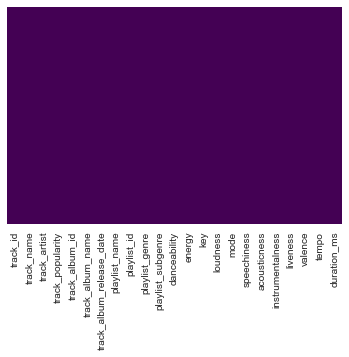

In [144]:
# check for null values
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

###### There are six unique playlist genres in the dataset. Each of them has 4 subgenres. Let's explore the patterns!

In [145]:
df['playlist_genre'].unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [146]:
df.groupby(['playlist_genre','playlist_subgenre']).size()

playlist_genre  playlist_subgenre        
edm             big room                     1206
                electro house                1511
                pop edm                      1517
                progressive electro house    1809
latin           latin hip hop                1656
                latin pop                    1262
                reggaeton                     949
                tropical                     1288
pop             dance pop                    1298
                electropop                   1408
                indie poptimism              1672
                post-teen pop                1129
r&b             hip pop                      1256
                neo soul                     1637
                new jack swing               1133
                urban contemporary           1405
rap             gangster rap                 1458
                hip hop                      1322
                southern hip hop             1675
        

In [147]:
# transform a data column to datetime type and create a separate column with the year of playlist release
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])
df['track_album_release_year'] = df['track_album_release_date'].apply(lambda x : x.year)

## Figure below illustrates the distribution of popularity over the genres

__Track popularity__ is a value between 0 and 100, with 100 being the most popular. It is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. In general, it means that songs that are being played now have a higher popularity than the songs that were played a lot in the past.

The popularity is normally distributed across all genres with a mean of 42.47 and standard deviation of 24.98. Pop genre has the highest mean popularity of 47.74, while edm genre gets 34.83 in popularity on average. </p>
<p>Each category has a high number of zero popularity instances. It shows the tracks that are rarely listened to. The album tracks that were released in 2014 have the highest number of 0 popularity tracks that is 339. It means that in January 2020, users were less likely to listen to 2014 tracks.</p>

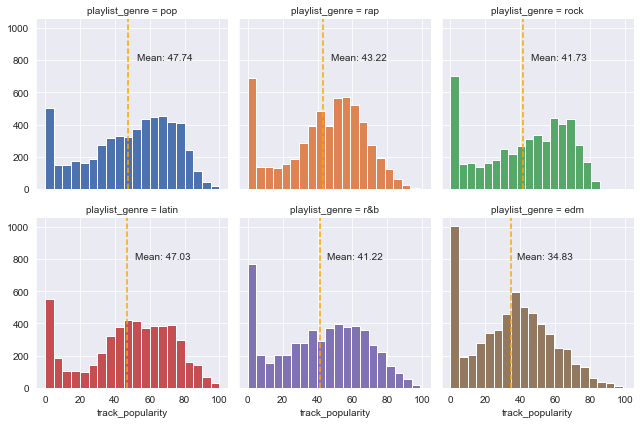

In [148]:
g = sns.FacetGrid(data=df,
                  col='playlist_genre',
                  col_wrap=3, 
                  hue = 'playlist_genre',
                  palette='deep')
g.map(plt.hist,'track_popularity', bins=20)
g.map(lambda x, **kwargs: plt.axvline(x.mean(), color="orange", linestyle='dashed'), 'track_popularity')
g.map(lambda x, **kwargs: plt.text(x.mean()*1.1, 800, f'Mean: {round(x.mean(),2)}'), 'track_popularity')

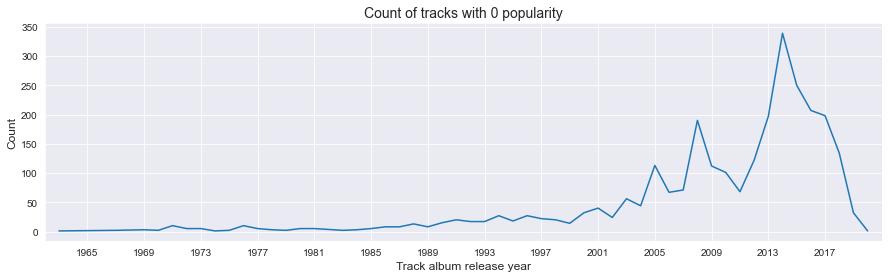

In [149]:
df[df['track_popularity']==0].groupby('track_album_release_year').size().plot(figsize=(15,4))
plt.xlabel('Track album release year', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Count of tracks with 0 popularity', fontsize=14)
plt.xticks(np.arange(min(df['track_album_release_year']), max(df['track_album_release_year'])+1, 4.0))
plt.xlim(1962,2021)

####  To get a better understanding of recent trends, let's create a dataframe where popularity is above 90.

In [150]:
# create a dataframe with the tracks that scored >90 in popularity
df1 = df[df['track_popularity']>90]

### The figure below illustrates the titles that gained more than 90 in popularity according to Spotify metrics.
Latin playlists are getting the most popularity with 73 titles scoring more than 90 in popularity. On the other hand, only **one** rock playlist was deemed on the top of popularity. It was 'Bad guy' by Billie Eilish with a popularity of 95.

In [151]:
pal = ["#b53941", "#6e5ca4", "#3c5ca1", "#80654d", "#d37042", "#469b56"]

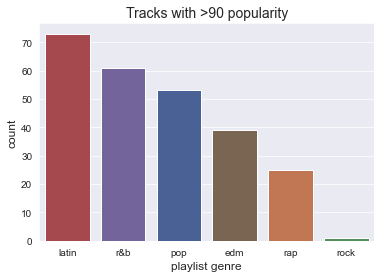

In [152]:
sns.countplot(data = df1,
              palette=pal,
              x = 'playlist_genre', 
              order = df1['playlist_genre'].value_counts(ascending=False).index)
plt.xlabel('playlist genre', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title('Tracks with >90 popularity', fontsize=14)

In [153]:
df1['playlist_genre'].value_counts()

latin    73
r&b      61
pop      53
edm      39
rap      25
rock      1
Name: playlist_genre, dtype: int64

In [154]:
df1[df1['playlist_genre'] == 'rock']

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_year
13900,2Fxmhks0bxGSBdJ92vM42m,bad guy,Billie Eilish,95,0S0KGZnfBGSIssfF54WSJh,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,Permanent Wave,5Go0Jsxj1UnsU7Om841BEo,rock,...,-10.965,1,0.375,0.328,0.13,0.1,0.562,135.128,194088,2019


### Artists that have the highest track popularity score on average

Next step in this analysis is to see which artists were the most popular at the time when the dataset was created.

Trevor Daniel has the highest average popularity score of 97. However, it is worth mentioning that the top 5 artists have less than 20 titles. I have to put a threshhold of 20 titles minimum. By that, I filtered the artists that have been getting high popularity scores and keep traction now with several titles released.

In [155]:
df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending = False)

track_artist
Trevor Daniel       97.000000
Y2K                 91.000000
Don Toliver         90.714286
Roddy Ricch         88.210526
DaBaby              87.857143
                      ...    
TST                  0.000000
DREAMS COME TRUE     0.000000
TKA                  0.000000
DY                   0.000000
Mark Isham           0.000000
Name: track_popularity, Length: 10692, dtype: float64

In [156]:
df_art = df['track_artist'].value_counts()

In [157]:
df_art.filter(items=['Trevor Daniel','Y2K','Don Toliver', 'Roddy Ricch', 'DaBaby'])

Trevor Daniel     6
Y2K               7
Don Toliver       7
Roddy Ricch      19
DaBaby           14
Name: track_artist, dtype: int64

In [158]:
dft= df.groupby('track_artist').filter(lambda x: len(x) > 20)

In [159]:
dft = dft.groupby('track_artist')['track_popularity'].mean().sort_values(ascending = False)

In [160]:
dft.head(5)[::-1]

track_artist
Camila Cabello    77.105263
Travis Scott      82.147059
Billie Eilish     83.581395
Harry Styles      83.592593
Lewis Capaldi     83.714286
Name: track_popularity, dtype: float64

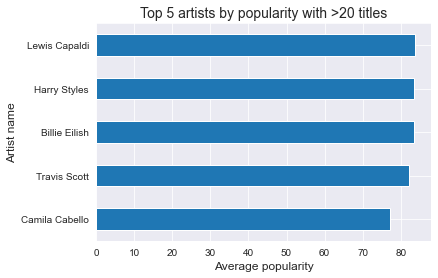

In [161]:
plt.figure(figsize=(6, 4))
dft.head(5)[::-1].plot.barh()
plt.xlabel('Average popularity', fontsize = 12)
plt.ylabel('Artist name', fontsize = 12)
plt.title('Top 5 artists by popularity with >20 titles', fontsize=14)
plt.savefig('artist_popularity.png')

### Duration of the track over time

Next step in this analysis is to observe whether there are any patterns of duration of the track in correlation with the year of its album release.

As shown on the figure below, all genres have a downward-sloping trend of the duration of the track. Electronic dance music (edm) genre is the youngest genre (with the first track album in 1977) and has the sharpest drop in duration of the track. 

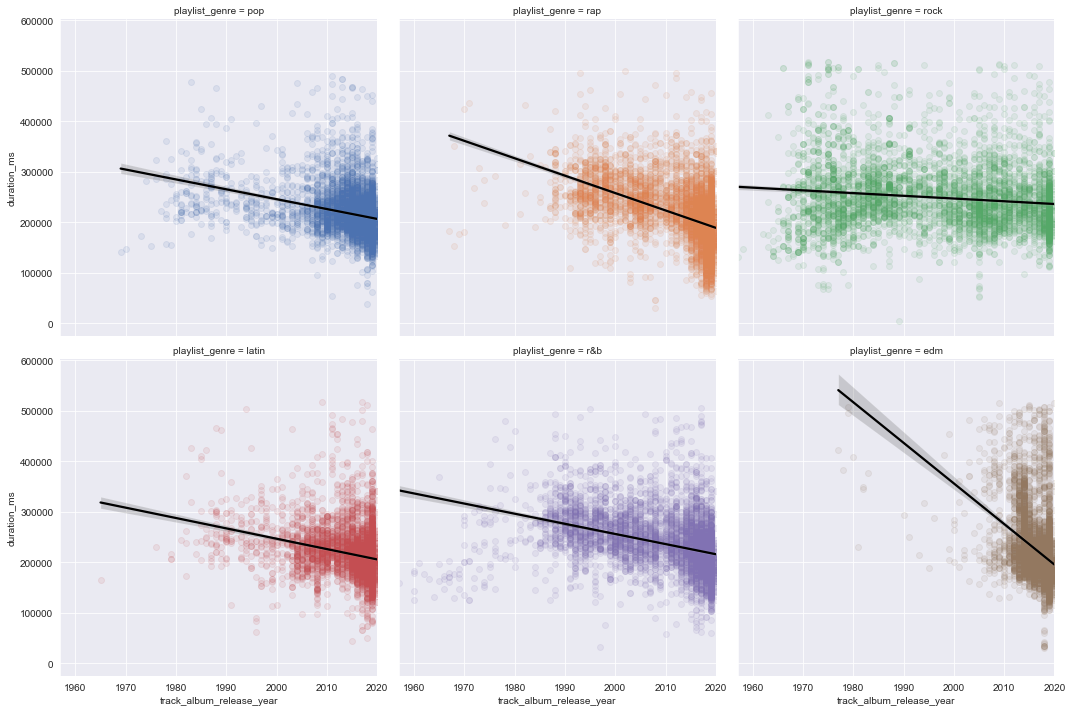

In [162]:
sns.lmplot(data=df, 
           x='track_album_release_year', 
           y='duration_ms',
           col='playlist_genre',
           scatter_kws={'alpha':0.1},
           line_kws={'color':'black'},
           col_wrap = 3, 
           hue = 'playlist_genre',
           palette='deep')

## Correlation of the mertics
Overall there is a low correlation between the metrics of the track. However,  there are three notebale findings:

<p>1) The higher the acousticness - the lower the energy. This pattern is self-explanatory, as in a person would feel more lively and energetic listening to some high-beat music rather than to Chopin-Nocturn in C minor. </p>
<p>2) On the other hand, the higher the loudness - the higher the energy. It is best illustrated at the clubs and bars where the loud music keeps the high energy level at the place </p>
<p>3) Lastly, the higher the valence - the higher the danceability. It signifies that users are more like to dance while cheerful music is playing. </p>

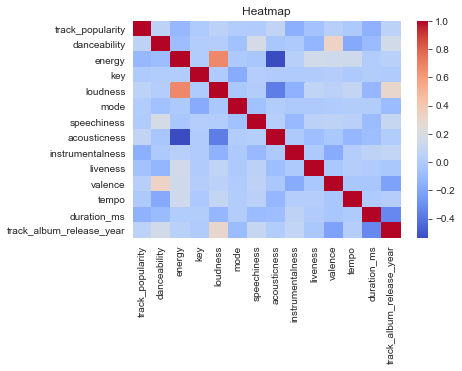

In [163]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('Heatmap')
plt.savefig('heatmap.png')

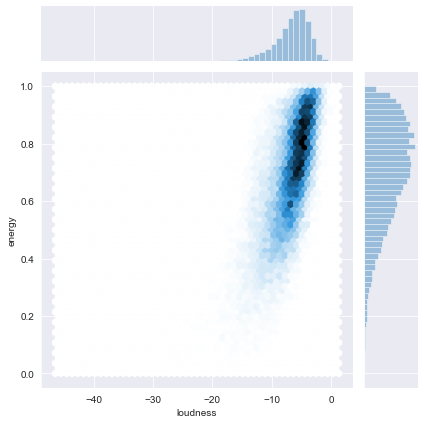

In [164]:
sns.jointplot(data=df, x='loudness',y='energy',kind='hex')

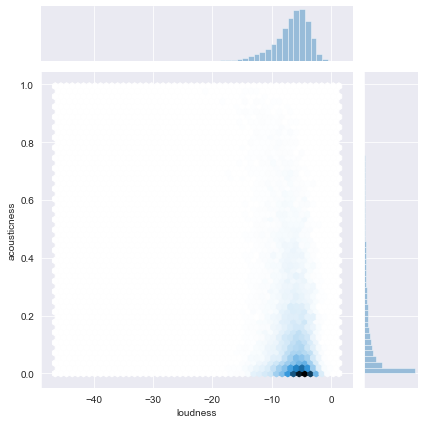

In [165]:
sns.jointplot(data=df, x='loudness',y='acousticness',kind='hex')

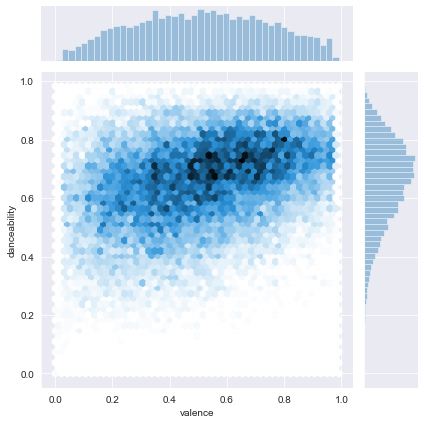

In [166]:
sns.jointplot(data=df, x='valence', y = 'danceability',kind='hex')

# ML to predict track popularity by its metrics

With this ML model I attempted to predict track popularity based on its metrics.

In [167]:
df_ml = df.drop(['track_id', 'track_name', 'track_artist',
                 'track_album_id', 'track_album_name', 'track_album_release_date',
                 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
                 'track_album_release_year'], axis=1)

In [168]:
from sklearn.preprocessing import StandardScaler

In [169]:
scaler = StandardScaler()

In [170]:
scaler.fit(df_ml.drop('track_popularity', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [171]:
scaled_features = scaler.transform(df_ml.drop('track_popularity', axis = 1))

In [172]:
df_feat = pd.DataFrame(scaled_features,columns=df_ml.columns[1:])

In [173]:
df_feat.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.642049,1.201614,0.173200,1.367123,0.876177,-0.481362,-0.333898,-0.377953,-0.809230,0.031908,0.042927,-0.518874
1,0.490412,0.643317,1.557627,0.585766,0.876177,-0.688642,-0.468670,-0.359177,1.081061,0.782522,-0.777198,-1.056268
2,0.138889,1.284529,-1.211227,1.100090,-1.141322,-0.324422,-0.436799,-0.377849,-0.519562,0.439384,0.116227,-0.822017
3,0.435271,1.279002,0.450085,0.984309,0.876177,-0.050024,-0.667642,-0.377911,0.089582,-1.001795,0.039953,-0.947750
4,-0.033426,0.742815,-1.211227,0.685151,0.876177,-0.702460,-0.432701,-0.377953,-0.692585,0.919777,0.115037,-0.614172


##### As **features** I have chosen to grab all metrics available, and our target is track popularity

In [174]:
X = df_feat
y = df_ml['track_popularity']

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##### For this problem I used a simple linear regression as the most simple model to see how close we can get to the target variable

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
reg = LinearRegression()

In [179]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
predictions = reg.predict(X_test)

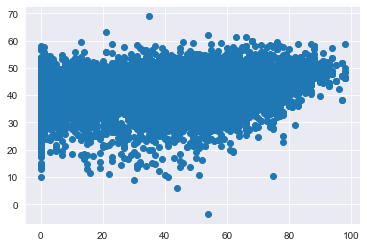

In [181]:
plt.scatter(y_test,predictions)

As illustrated on a **Figure** below, the residual histogram has a bimodal distribution which signignifies that our dataset has an anomaly. As the first peak is skewed to the right, I would assume that this behaviour can be explained by a large number (_n_ = 2703) of labeled popularity of 0. 
<p> It is important to understand that the labeled tracks are identified as 0 based on their popularity NOW. It means that this dataset does not capture the actual score of popularity over its lifespan. For a better modeling, I would like to have the data of the top performance of the track to build the model to determine what popularity it can reach despite of the recent attribute of the popularity. </p>
<p> For this model RMSE = 24.06 and I would not launch the model as the error is too significant for this situation. </p>



Text(0.5, 1.0, 'Residual histogram')

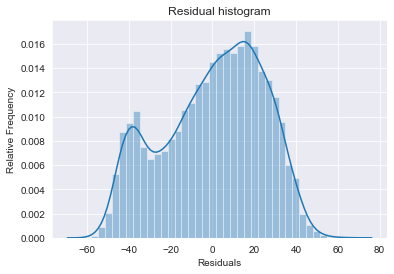

In [182]:
sns.distplot(y_test-predictions)
plt.xlabel('Residuals')
plt.ylabel('Relative Frequency')
plt.title('Residual histogram')

In [183]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 20.10602757092287
MSE: 577.3258671766826
RMSE: 24.02760635553784



<p> To get closer for this model to be deployable, I would gather the information of peak popularity of the track (dropping recent time factor). </p>

## End